# Finding other Psi values from Psi_0

How to do this?  We have Snell's law for it:

$$ \frac{n_j}{n_0} = \frac{\cos \Psi_0}{\cos \Psi_j},$$

using the definition of $\Psi$ as the complement of the angle of incidence $\theta$ typically used in Snell's law.  So from this we have:

$$ \Psi_j = \arccos \left( \frac{n_0}{n_j} \cos \Psi_0 \right)$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from slab import SlabExact, plot_complex, plot_complex_surface
plt.style.use('dark_background')
%matplotlib widget

In [2]:
A = SlabExact(ns=[2, 1, 3, 2], Ts=[3, 3, 3, 3], symmetric=True)

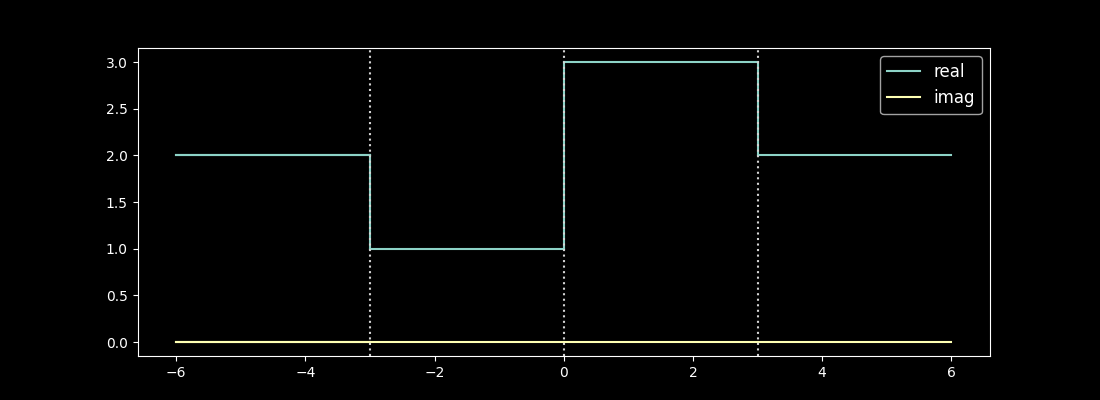

In [3]:
A.plot_refractive_index();

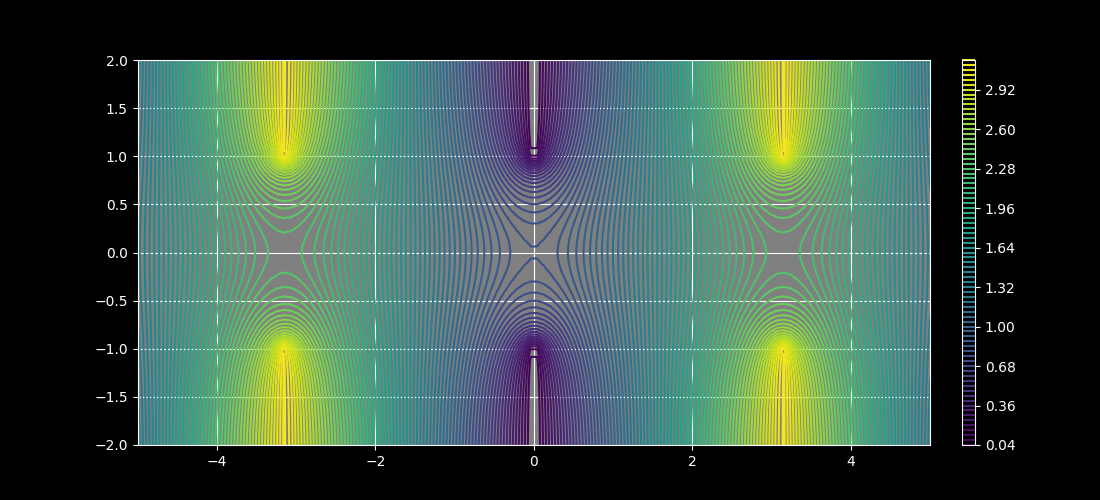

In [5]:
plot_complex(A.Psi_i_from_Psi0, -5, 5, -2, 2, fargs=(A.ns[2],), iref=120, rref=120, levels=80, log_abs=False, part='real')

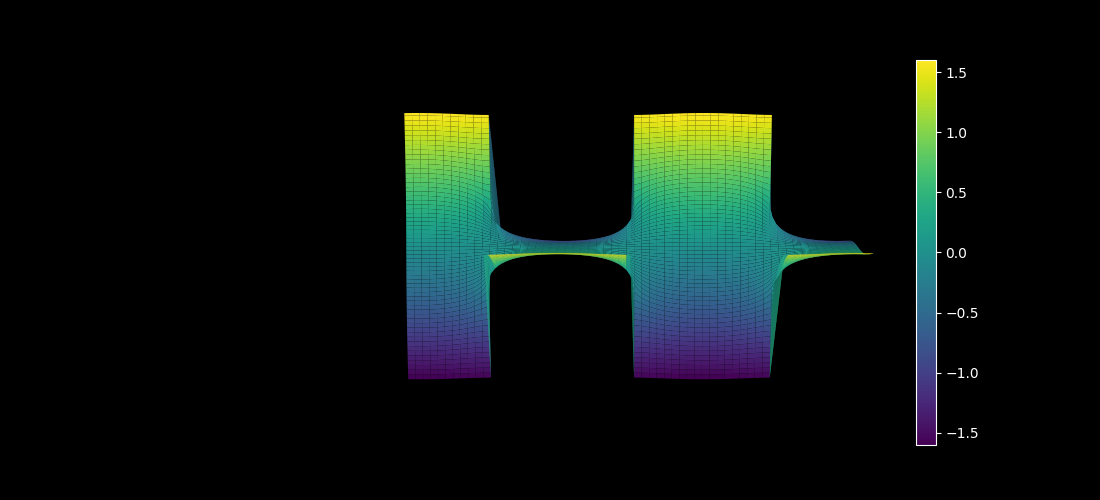

In [7]:
plot_complex_surface(A.Psi_i_from_Psi0, -5, 5, -2, 2, fargs=(A.ns[2],), iref=120, rref=120, levels=80, log_abs=False, part='imag')

So there are still branch cuts in that definition.  Let's look at the $Z_i$ values.

In [8]:
def Zi_via_Psi0(Psi0, ni):
    Psi_i = A.Psi_i_from_Psi0(Psi0, ni)
    return A.K0 * ni * np.sin(Psi_i)

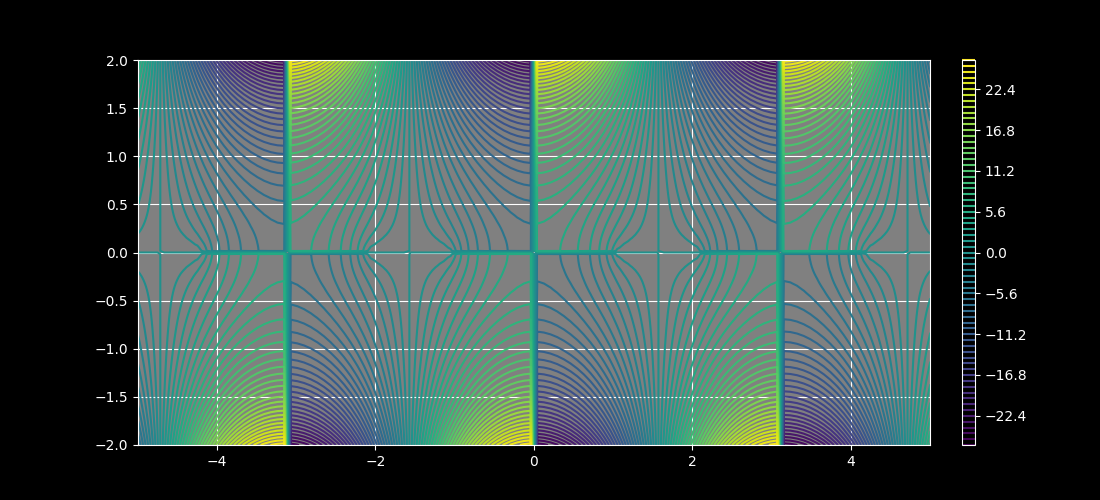

In [32]:
plot_complex(Zi_via_Psi0, -5, 5, -2, 2, fargs=(A.ns[1],), iref=120, rref=120, levels=80, log_abs=False, part='imag')

There is another way now of doing Zi from Z0 right?  Above we use Psi0 to to find Psi_i and then use it for Zi.  But we could instead use Psi0 to find Z0 and then use Zi_from Z0.  How do these differ?

In [17]:
def Zi_via_Psi02(Psi0, ni):
    Z0 = A.K0 * A.n0 * np.sin(Psi0)
    return A.Zi_from_Z0(Z0, ni)

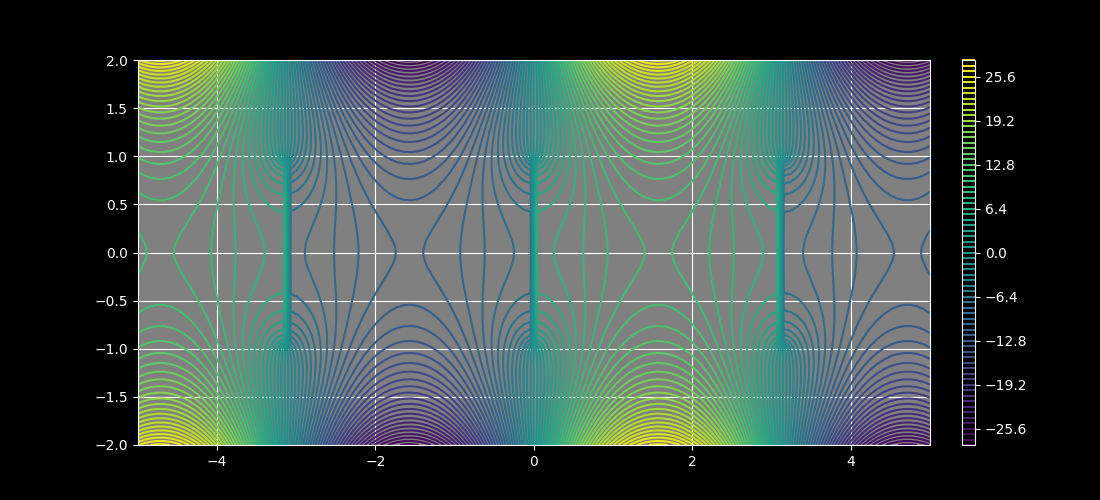

In [27]:
plot_complex(Zi_via_Psi02, -5, 5, -2, 2, fargs=(A.ns[2],), iref=120, rref=120, levels=80, log_abs=False, part='real')

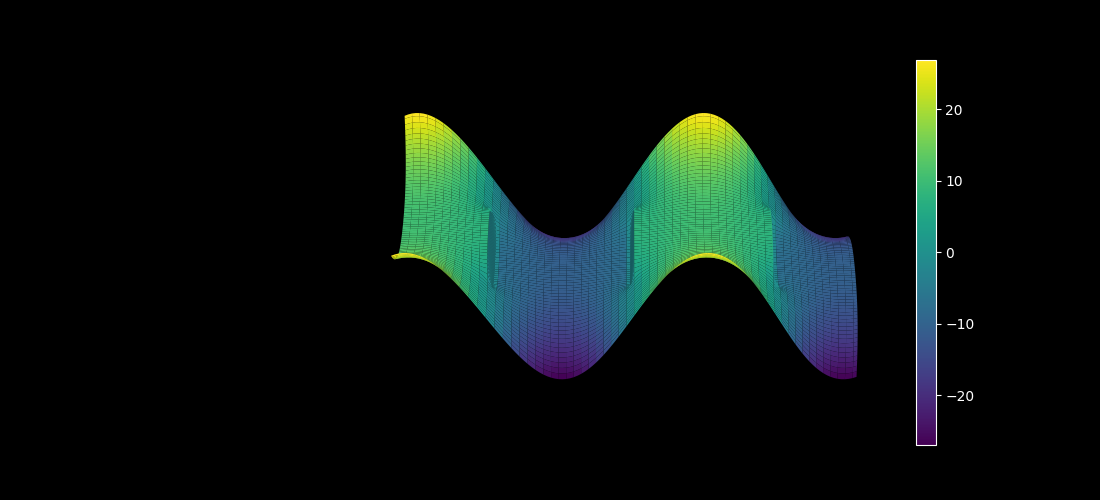

In [31]:
plot_complex_surface(Zi_via_Psi02, -5, 5, -2, 2, fargs=(A.ns[2],), iref=120, rref=120, part='real')